In [ ]:
#지난주에 회귀랑 분류 해봄. (지난주까지 한걸 지도학습이라고함)

# 이번주부터 비지도 학습. 
# 군집화 Clustering 란 소속집단의 정보가 없고 모르는 상태에서 비슷한 집단으로 묶는 비지도학습.

# 입력데이터를 바탕으로 출력값을 예측하는 목적으로 사용되기 보다는 데이터에서 의미를 파악하고 기준을 만드는 목적으로 사용


#                          분류       군집화
# 소속 집단에 대한 정보    있다        없다             #클래스가 뭐뭐 있나 하는정보, ex)아이리스에는 품좀이 3가지가있음. 
# 레이블 유무              있다        없다             
# 종류                   지도학습    비지도학습
# 공통점         데이터를 비슷한집단으로 묶는방법 


In [ ]:
# k-평균 알고리즘 (k-means algorithm):

# k-평균 알고리즘은 비지도학습 알고리즘으로, 주어진 데이터를 k개의 클러스터로 그룹화하는데 사용됩니다.


# 알고리즘의 작동 방식:

# 초기에 k개의 중심(centroid)을 무작위로 선택
# 각 데이터 포인트를 가장 가까운 중심에 할당
# 각 클러스터의 중심을 재계산
# 중심의 위치가 변경되지 않을 때까지 2단계와 3단계를 반복
# k-평균 알고리즘은 클러스터링 문제에 적용되며, 데이터를 서로 다른 그룹으로 나누는 데 유용함
#그러나 클러스터의 개수 k를 사전에 지정해야하는 단점이 있음

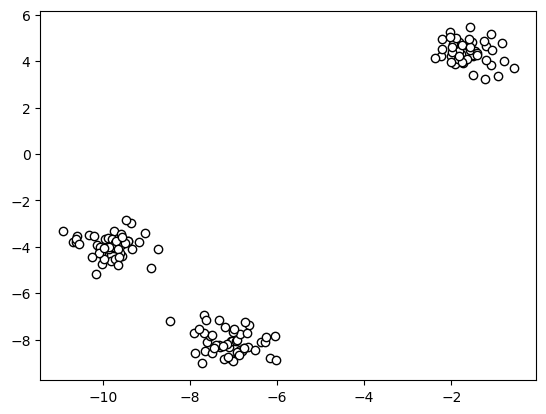

In [1]:
from sklearn.datasets import make_blobs #make_blobs 함수를 사용하여 가상의 데이터셋을 생성하는 예시

#make_blobs 함수는 클러스터링을 위한 가상의 데이터셋을 생성 

X , y =  make_blobs(n_samples= 150, n_features=2 , centers= 3 , #(실제 Y 는 모르는 상태임)
                       cluster_std= 0.5 , shuffle= True, random_state=1)
# n_samples: 생성할 데이터 포인트의 총 개수

# n_features: 각 데이터 포인트가 가지는 특성(feature)의 개수

# centers: 생성될 클러스터의 개수

# cluster_std: 각 클러스터 내의 데이터 포인트가 얼마나 퍼져 있는지를 나타내는 표준 편차를 설정
              #위의 예시에서는 0.5로 설정되어 있으므로 클러스터 내의 데이터 포인트들은 상대적으로 가까이 위치하며, 
              #숫자가 클수록 클러스터 간의 거리는 멀리 떨어져 있을 것

#shuffle: 데이터 포인트를 무작위로 섞을지 여부

#random_state: 데이터셋을 생성할 때 사용되는 난수 발생기의 시드를 설정


import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0], X[:,1], c="white" , edgecolors="black")
plt.show()

In [2]:
from sklearn.cluster import KMeans # 클래스는 K-평균 알고리즘을 구현한 것

km = KMeans(n_clusters=3, init= 'random', n_init=1 ,max_iter = 300 ,random_state = 0 )

#n_clusters=3: 클러스터의 개수를 3으로 설정

#init='random': 클러스터 중심의 초기화 방법을 'random'으로 설정  이는 무작위로 클러스터 중심을 초기화하는 방식

#n_init : 초기 클러스터 중심을 선택하는 시도 횟수를 나타냄 기본적으로 KMeans 클래스에서는 값이 10으로 설정

#max_iter=300: 알고리즘의 최대 반복 횟수를 300으로 설정  즉, 최대 300번의 반복을 수행하고 알고리즘을 종료

# random_state=0: 난수 발생기의 시드를 0으로 설정합니다. 이는 알고리즘의 실행을 재현 가능하게 만듬

km.fit(X)# km.fit(X): KMeans 객체인 km을 사용하여 데이터셋 X를 클러스터링


C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=1, random_state=0)

In [3]:
p = km.predict(X) #데이터셋 X에 대한 예측을 수행하는 메서드
p

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1])

In [4]:
centers = km.cluster_centers_
km.cluster_centers_ #이게 각각 cluster 좌표값.

array([[-7.0951497 , -8.1114237 ],
       [-9.8394448 , -3.96236399],
       [-1.6114244 ,  4.41658512]])

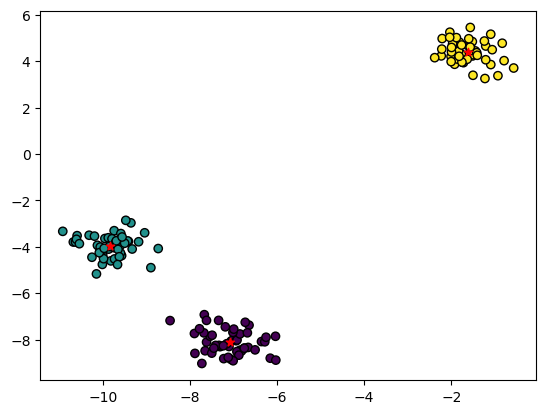

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = p , edgecolors="black")
# 데이터셋 X의 첫 번째 열을 x 좌표로, 두 번째 열을 y 좌표로 설정하여 산점도 나타냄
#c=p는 클러스터 예측 결과인 p를 사용하여 각 데이터 포인트의 색상을 지정

plt.scatter(centers[:,0] , centers[:,1], c="r", marker="*" ) #중심 보기 
#클러스터 중심의 첫 번째 열 값을 x 좌표로, centers[:,1]는 두 번째 열 값을 y 좌표로 설정
plt.show()

In [6]:
#실루엣 계수 ? 
import numpy as np
from sklearn.metrics import silhouette_samples  ,silhouette_score
#실루엣 계수를 계산하는 메서드를 사용하여 클러스터링 결과의 품질을 평가하는 예시

vals = silhouette_samples(X , p , metric= "euclidean")
#X 데이터셋과 클러스터 예측 결과인 p를 사용하여 각 데이터 포인트의 실루엣 샘플 값을 계산
#metric="euclidean"는 실루엣 계수를 계산할 때 유클리디안 거리를 사용함을 나타냄

#vals는 각 데이터 포인트의 실루엣 샘플 값들을 담은 1차원 배열

sil_score = silhouette_score(X , p , metric= "euclidean")
#X 데이터셋과 클러스터 예측 결과인 p를 사용하여 전체 데이터셋의 실루엣 스코어를 계산
#metric="euclidean"는 실루엣 계수를 계산할 때 유클리디안 거리를 사용함

#sil_score은 전체 데이터셋의 실루엣 스코어를 나타내는 실수값

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


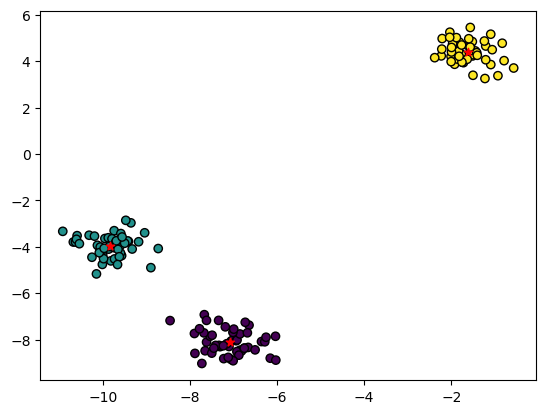

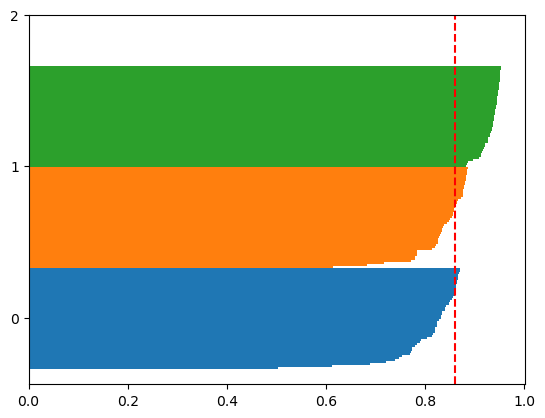

In [7]:
#모델 생성/학습
km = KMeans(n_clusters=3, init= 'random', n_init=1 ,max_iter = 300 ,random_state = 0 )
km.fit(X)
p = km.predict(X)

#모델 군집화 
plt.figure()
plt.scatter(X[:,0], X[:,1], c = p , edgecolors="black") 
plt.scatter(centers[:,0] , centers[:,1], c="r", marker="*" ) 
plt.show()

#실루엣 그래프 시각화
vals = silhouette_samples(X , p , metric= "euclidean")
sil_score = silhouette_score(X , p , metric= "euclidean")
labels = np.unique(p)
#예, p가 [0, 1, 1, 2, 0, 2, 2]와 같은 배열을 가지고 있다면, np.unique(p)는 [0, 1, 2]와 같은 고유한 값들을 반환

plt.figure()
y_low=0
y_high=0
y_ticks = []
for i in labels:
    ivals = vals[p == i]  # 해당 클러스터 레이블에 속하는 데이터 포인트의 실루엣 샘플 값을 가져옵니다.
    ivals.sort()          # 실루엣 샘플 값을 정렬합 
    y_high += len(ivals)  # 현재 클러스터에 대한 막대 그래프의 y 좌표 범위 상한값
    plt.barh(range(y_low,y_high) , ivals , height =1)# range(y_low,y_high) 막대 그래프의 y 좌표 범위를 나타내며, 
                                                     # ivals는 해당 클러스터의 실루엣 샘플 값들을 의미
    y_ticks.append(y_low + y_high / 2)               #  현재 클러스터에 대한 y 좌표의 중간값 
    y_low = y_high #클러스터에 대한 막대 그래프의 y 좌표 범위 하한값을 현재 클러스터의 상한값으로 설정
    
plt.axvline(sil_score , color = "r" , linestyle="--")  #전체 데이터셋의 실루엣 스코어를 나타내는 수직선을 그립니다
                                                       #sil_score는 전체 데이터셋의 실루엣 스코어 값
plt.yticks(y_ticks , labels)
plt.show()

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


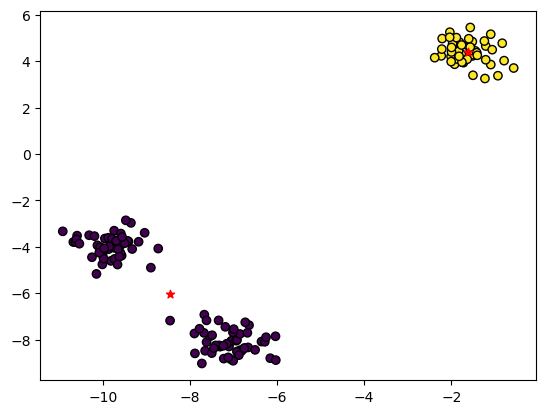

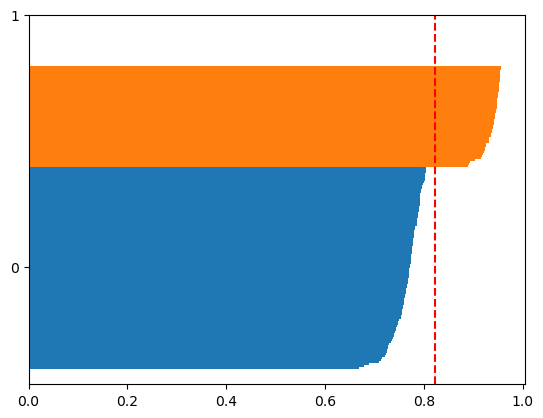

In [22]:
#모델 생성/학습
km = KMeans(n_clusters=2, init= 'random', n_init=1 ,max_iter = 300 ,random_state = 0 )
km.fit(X)
p = km.predict(X)

#모델 군집화 
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], c = p , edgecolors="black") 
plt.scatter(centers[:,0] , centers[:,1], c="r", marker="*" ) 
plt.show()

#실루엣 그래프 시각화
vals = silhouette_samples(X , p , metric= "euclidean")
sil_score = silhouette_score(X , p , metric= "euclidean")
labels = np.unique(p)

plt.figure()
y_low=0
y_high=0
y_ticks = []
for i in labels:
    ivals = vals[p == i]  
    ivals.sort()          
    y_high += len(ivals)   
    plt.barh(range(y_low,y_high) , ivals , height =1)  
    y_ticks.append(y_low + y_high / 2)             
    y_low = y_high  
    
plt.axvline(sil_score , color = "r" , linestyle="--") 
plt.yticks(y_ticks , labels)
plt.show()

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


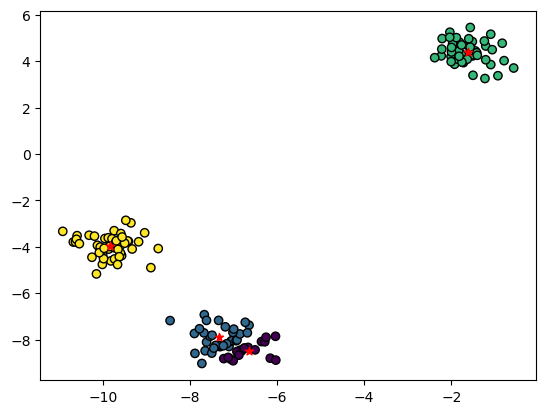

len :  18 y_high => : 0
len :  32 y_high => : 18
len :  50 y_high => : 50
len :  50 y_high => : 100


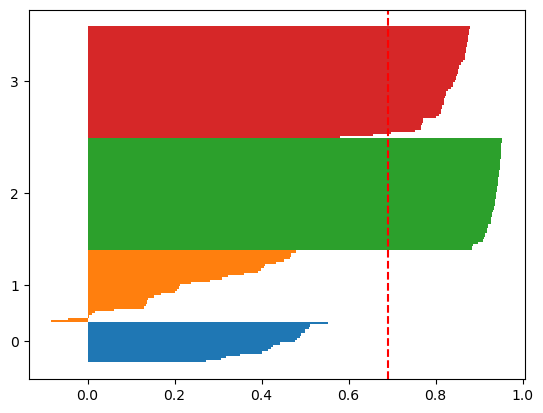

In [41]:
# 모델 생성/학습
km = KMeans(n_clusters=4, init='random', n_init=1, max_iter=300, random_state=0)
km.fit(X)
p = km.predict(X)

# 모델 군집화
centers = km.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors="black")
plt.scatter(centers[:, 0], centers[:, 1], c="r", marker="*")
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X, p, metric="euclidean")
sil_score = silhouette_score(X, p, metric="euclidean")
labels = np.unique(p)

plt.figure()
y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    print("len : ",len(ivals) , "y_high => :",y_high)
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1)
    y_ticks.append(y_low + (y_high - y_low) / 2)
    y_low = y_high

plt.axvline(sil_score, color="r", linestyle="--")
plt.yticks(y_ticks, labels)
plt.show()


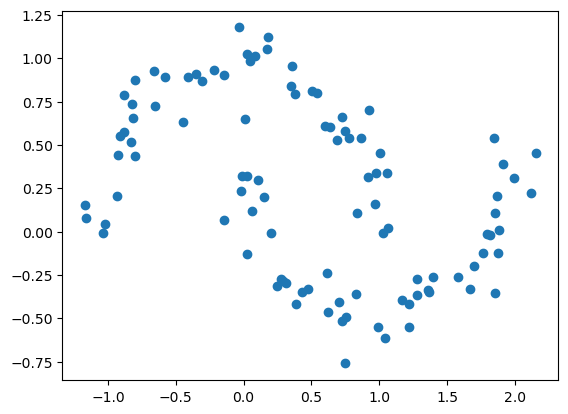

In [118]:
from sklearn.datasets import make_moons #달 모양의 데이터셋을 생성

X , y = make_moons (n_samples= 100, noise= 0.1 ,random_state=1)
#n_samples는 생성할 데이터 포인트의 개수를 나타내며, noise는 데이터 포인트에 추가될 잡음의 크기를 조절

#noise 값이 0일 경우, 생성된 데이터 포인트는 완전한 달 모양을 따라 배치됨
#하지만 noise 값이 0보다 크면 데이터 포인트들은 달 모양에서 약간 벗어난 위치에 무작위로 흩어짐.
#noise 값이 작을수록 데이터 포인트들이 달 모양에 가까워지고, noise 값이 클수록 데이터 포인트들이 달 모양에서 더욱 벗어나게 됨.

# 따라서 noise=0.1은 생성된 데이터셋에 10%의 잡음이 추가된다는 의미
plt.figure()
plt.scatter(X[:,0] , X[:,1])
plt.show()

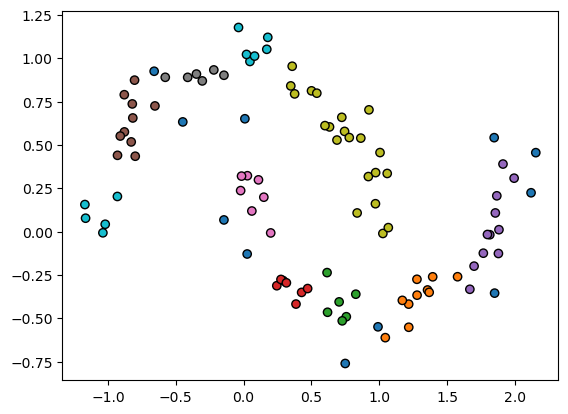

In [149]:
from sklearn.cluster import DBSCAN #밀도 기반 군집화를 수행하는데 사용
db = DBSCAN(eps= 0.2, min_samples= 5 , metric="euclidean")
# eps는 군집을 형성하기 위한 최대 거리를 나타내는 매개변수
# min_samples는 하나의 군집에 포함되기 위한 최소 데이터 포인트 수
# metric은 거리 측정 방법을 지정하는 매개변수로, "euclidean"은 유클리디안 거리를 사용함을 의미
p = db.fit_predict(X)
# 생성된 DBSCAN 모델을 데이터셋 X에 적용하여 군집 레이블을 예측

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=p, edgecolors="black", cmap="tab10")
 
plt.show()

In [128]:
머신러닝에서 이상탐지를 하기위해 쓰는 비지도학습이 
금요일에 배웠던 소프트웨이 기반의 것. 데이터가 정상밖에 없다 -> ex)공항 ccTV 등 
클래스가 1 개밖에 없다 - 1 class SVM  (CSV) 


array([ 0,  3, -1,  0, -1,  7,  4,  0,  1,  2,  3,  4,  5,  5,  5,  6,  6,
        4,  0,  7,  7,  1,  3,  2,  7,  4,  3,  6,  9,  4,  1, -1, -1,  3,
        3,  4,  9, -1,  8, -1,  3,  5,  0,  7,  0,  4,  9,  3,  8, -1,  4,
        5,  8,  7,  5,  9,  7, -1,  7, -1,  6,  2,  1,  4,  9,  3,  7,  2,
        7,  3,  5,  8,  2,  2,  7,  3,  7,  1,  0,  7,  6,  6,  7,  7,  8,
       -1,  8,  7,  1,  0,  7,  7,  2,  0,  7,  0,  7, -1,  7,  4],
      dtype=int64)

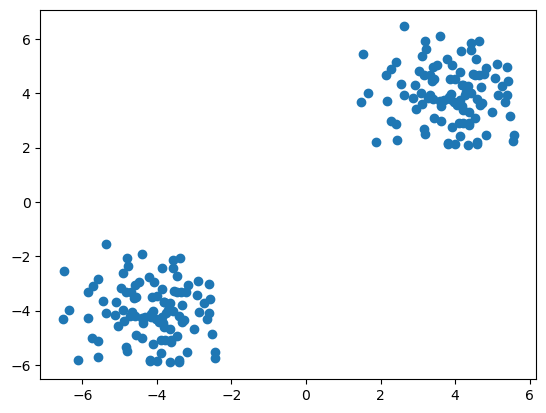

In [172]:
X = np.random.randn(100,2)
X = np.r_[X+4 , X-4]
plt.figure()
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [168]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(gamma=0.1 , nu =0.1 , kernel= 'rbf')
ocsvm.fit(X)
# ocsvm.predict()

OneClassSVM(gamma=0.1, nu=0.1)

In [169]:
from matplotlib.colors import ListedColormap
def plot_ocsvm_regions(X, classifier, resolution=0.02): 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 

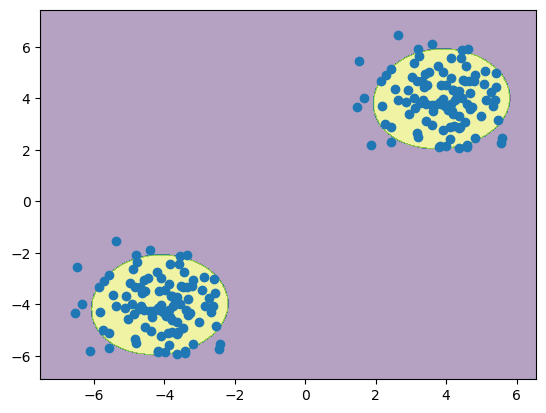

In [173]:
plot_ocsvm_regions(X , ocsvm)
plt.scatter(X[:,0] , X[:,1])
plt.show()

In [181]:
from matplotlib.colors import ListedColormap
def plot_ocsvm_regions_subplot(X, classifier, ax , resolution=0.02): 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max()) 

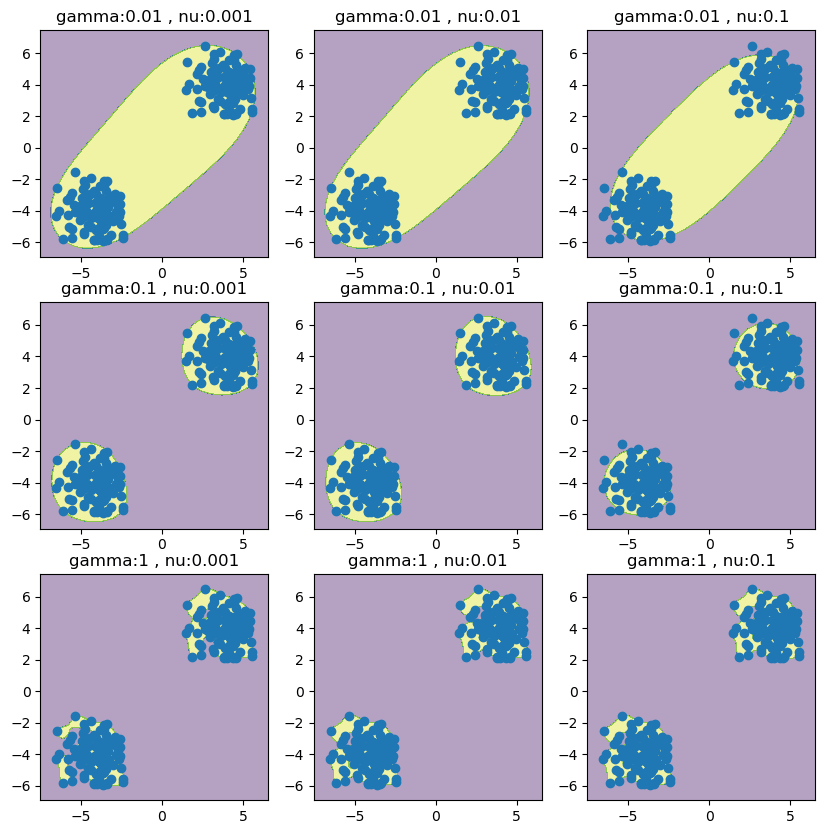

In [197]:
fig , axes = plt.subplots(3,3, figsize=(10,10))
for i, gamma in  enumerate ([0.01, 0.1, 1]):
    for j ,  nu in enumerate([0.001, 0.01, 0.1]):
        ocsvm = OneClassSVM(gamma= gamma  , nu=nu  , kernel= 'rbf')
        ocsvm.fit(X)
        plot_ocsvm_regions_subplot(X , ocsvm , ax= axes[i][j] )
        axes[i][j].scatter(X[:,0] , X[:,1])
        axes[i][j].set_title(f"gamma:{gamma} , nu:{nu}")
        
plt.show()